In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import re

In [2]:
data = pd.read_csv('UPDATE_HOUSE.csv')
data['Price'] = data['Price'].str.replace(' ', '').astype(int)
data

,Type of housing,Area,Price,Metro name,Metro distance,District,Living space,Ceiling height,Floor,Max Floor
0,квартира,75.2,7500000,Технологический институт,0.3,Адмиралтейский район,50.9,3.05,4,5
1,квартира,112.5,12900000,Владимирская,1.1,Адмиралтейский район,73.0,3.60,4,6
2,квартира,135.6,26929000,Приморская,1.0,Василеостровский район,78.4,3.31,10,16
3,квартира,143.6,23769000,Приморская,1.0,Василеостровский район,76.3,3.00,4,10
4,квартира,163.0,24400000,Приморская,0.9,Василеостровский район,73.9,3.00,2,8
...,...,...,...,...,...,...,...,...,...,...
7200,квартира,50.0,5700000,Проспект Ветеранов,0.6,Кировский район,37.3,NaN,1,5
7201,квартира,39.5,5050000,Проспект Ветеранов,1.3,Кировский район,18.3,NaN,19,23
7202,квартира,40.0,4700000,Проспект Ветеранов,1.3,Кировский район,18.7,NaN,4,23
7203,квартира,35.0,4300000,Проспект Ветеранов,0.5,Кировский район,20.0,NaN,11,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of housing  7205 non-null   object 
 1   Area             7205 non-null   float64
 2   Price            7205 non-null   int32  
 3   Metro name       7201 non-null   object 
 4   Metro distance   7105 non-null   float64
 5   District         7205 non-null   object 
 6   Living space     7205 non-null   float64
 7   Ceiling height   5760 non-null   float64
 8   Floor            7205 non-null   int64  
 9   Max Floor        7205 non-null   int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 534.9+ KB


In [70]:
# Заметим, что есть пропуски. Чтобы не "портить статистику" удалям пропуски, где их много
#data.dropna(inplace=True,subset=['Ceiling height'])
#data.reset_index(inplace=True)
#del data['index']
#print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of housing  5760 non-null   object 
 1   Area             5760 non-null   float64
 2   Price            5760 non-null   int32  
 3   Metro name       5760 non-null   object 
 4   Metro distance   5683 non-null   float64
 5   District         5760 non-null   object 
 6   Living space     5760 non-null   float64
 7   Ceiling height   5760 non-null   float64
 8   Floor            5760 non-null   int64  
 9   Max Floor        5760 non-null   int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 427.6+ KB
None


In [71]:
#data.fillna(data.mean(), inplace=True) 

In [4]:
data.describe()

,Area,Price,Metro distance,Living space,Ceiling height,Floor,Max Floor
count,7205.000000,7.205000e+03,7105.000000,7205.000000,5760.000000,7205.000000,7205.000000
mean,60.227388,9.838310e+06,44.152217,30.234466,2.769189,8.500625,15.461069
std,42.534184,1.443316e+07,45.096770,24.190180,0.244795,6.154038,7.224606
min,11.550000,1.150000e+06,0.100000,3.410000,2.000000,1.000000,2.000000
25%,35.700000,4.114000e+06,2.400000,15.640000,2.640000,4.000000,9.000000
50%,46.400000,5.500000e+06,22.500000,21.300000,2.720000,7.000000,16.000000
75%,68.100000,9.574000e+06,96.200000,34.400000,2.800000,12.000000,22.000000
max,631.200000,2.600000e+08,118.800000,322.300000,7.000000,54.000000,35.000000


(array([0, 1, 2, 3]),
 [Text(0, 0, 'квартира'),
  Text(1, 0, 'Студия'),
  Text(2, 0, 'Апартаменты-cтудия'),
  Text(3, 0, 'апартаменты')])

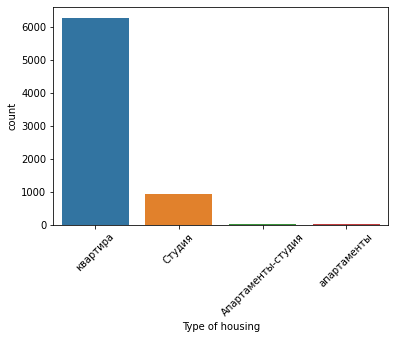

In [7]:
sns.countplot(data['Type of housing'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, 'Технологический институт'),
  Text(1, 0, 'Владимирская'),
  Text(2, 0, 'Приморская'),
  Text(3, 0, 'Василеостровская'),
  Text(4, 0, 'Балтийская'),
  Text(5, 0, 'Спортивная'),
  Text(6, 0, 'Пушкинская'),
  Text(7, 0, 'Садовая'),
  Text(8, 0, 'Фрунзенская'),
  Text(9, 0, 'Нарвская'),
  Text(10, 0, 'Адмиралтейская'),
  Text(11, 0, 'Сенная площадь '),
  Text(12, 0, 'Звенигородская'),
  Text(13, 0, 'Крестовский остров'),
  Text(14, 0, 'Московские ворота'),
  Text(15, 0, 'Спасская'),
  Text(16, 0, 'Гостиный Двор'),
  Text(17, 0, 'Петроградская'),
  Text(18, 0, 'Чкаловская'),
  Text(19, 0, 'Горьковская'),
  Text(20, 0, 'Выборгская'),
  Text(21, 0, 'Маяковская'),
  Text(22, 0, 'Площадь Восстани

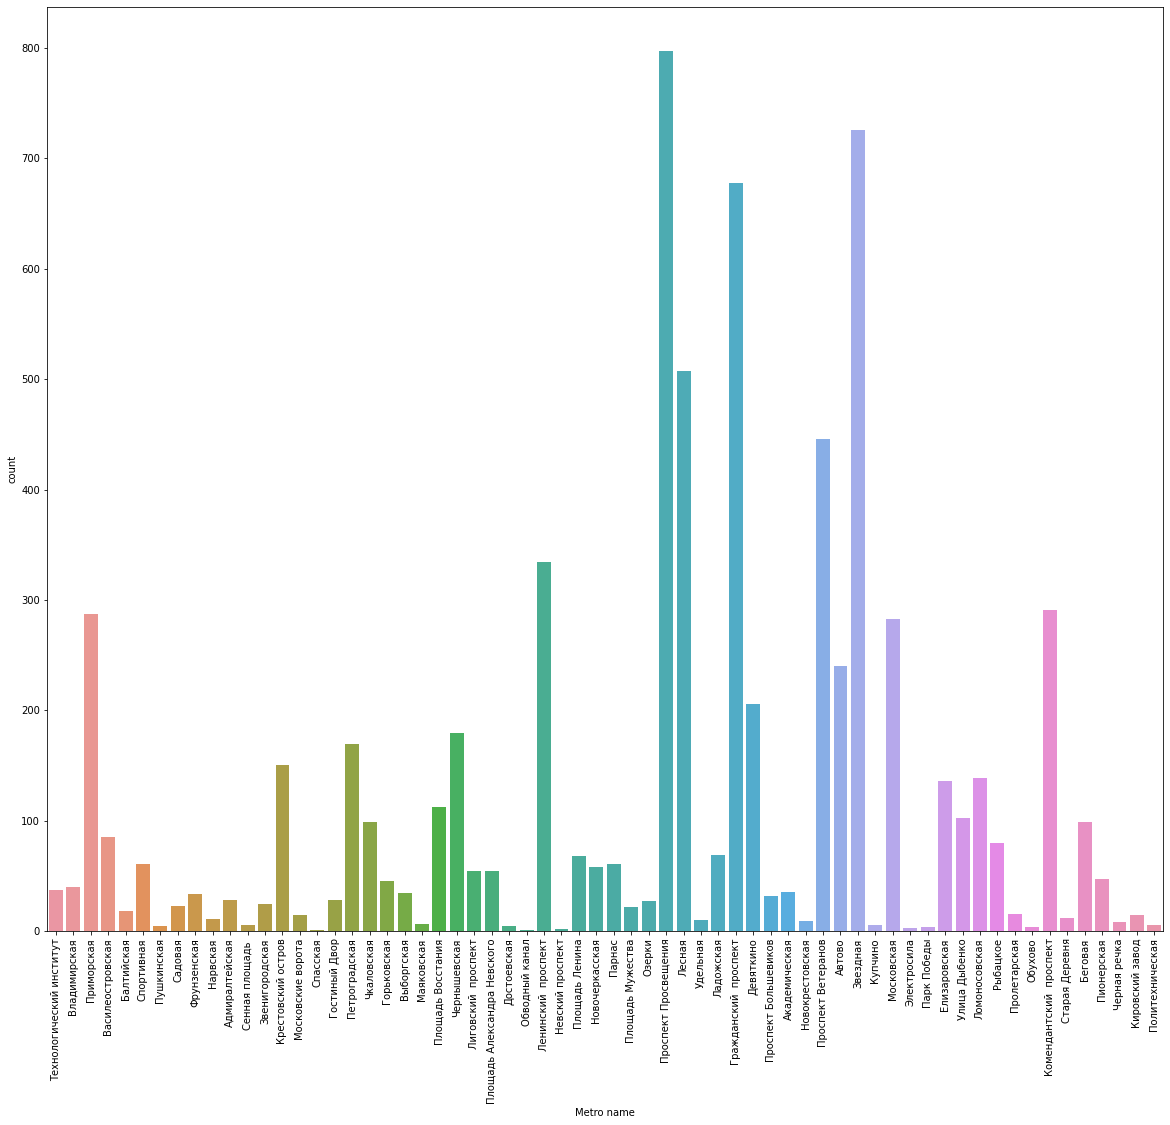

In [6]:
plt.figure(figsize=(20, 17))
sns.countplot(data['Metro name'])

plt.xticks(rotation=90)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of housing  5760 non-null   object 
 1   Area             5760 non-null   float64
 2   Price            5760 non-null   int32  
 3   Metro name       5760 non-null   object 
 4   Metro distance   5683 non-null   float64
 5   District         5760 non-null   object 
 6   Living space     5760 non-null   float64
 7   Ceiling height   5760 non-null   float64
 8   Floor            5760 non-null   int64  
 9   Max Floor        5760 non-null   int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 427.6+ KB
None


([<matplotlib.patches.Wedge at 0x225881987c0>,
 [Text(1.0014544060844237, 0.45507040393118753, 'Технологический институт'),
  Text(0.3863518571613824, 1.029918561085269, 'Владимирская'),
  Text(-0.3547193941261242, 1.0412368373385545, 'Приморская'),
  Text(-0.8745115524140434, 0.6672552320472129, 'Василеостровская'),
  Text(-1.0686187064746007, 0.2608717312637602, 'Балтийская'),
  Text(-1.098056691124744, -0.0653567370374216, 'Спортивная'),
  Text(-1.0344802303764167, -0.37396611204807856, 'Пушкинская'),
  Text(-0.9112698313027856, -0.6161065610406959, 'Садовая'),
  Text(-0.7580600008677099, -0.7970853373914539, 'Фрунзенская'),
  Text(-0.5727009062983531, -0.9391558294154624, 'Нарвская'),
  Text(-0.36265976191578886, -1.0384979042285947, 'Адмиралтейская'),
  Text(-0.15606048513670248, -1.0888733282521421, 'Сенная площадь '),
  Text(0.024596132757116605, -1.0997249793713857, 'Крестовский остров'),
  Text(0.18096056022035228, -1.0850130301727885, 'Звенигородская'),
  Text(0.3187389237362

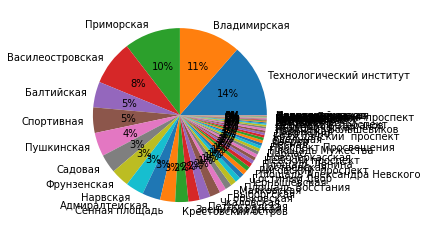

In [18]:
# Заметим, что есть пропуски. Чтобы не "портить статистику" удалям пропуски, где их много
data.dropna(inplace=True,subset=['Ceiling height'])
data.reset_index(inplace=True)
del data['index']
print(data.info())

# оставить только информативные данные
plt.pie(data['Metro name'].value_counts(), labels = data['Metro name'].unique(), autopct='%.0f%%')

## Посмотрим на взаимодействия между признаками

<AxesSubplot:>

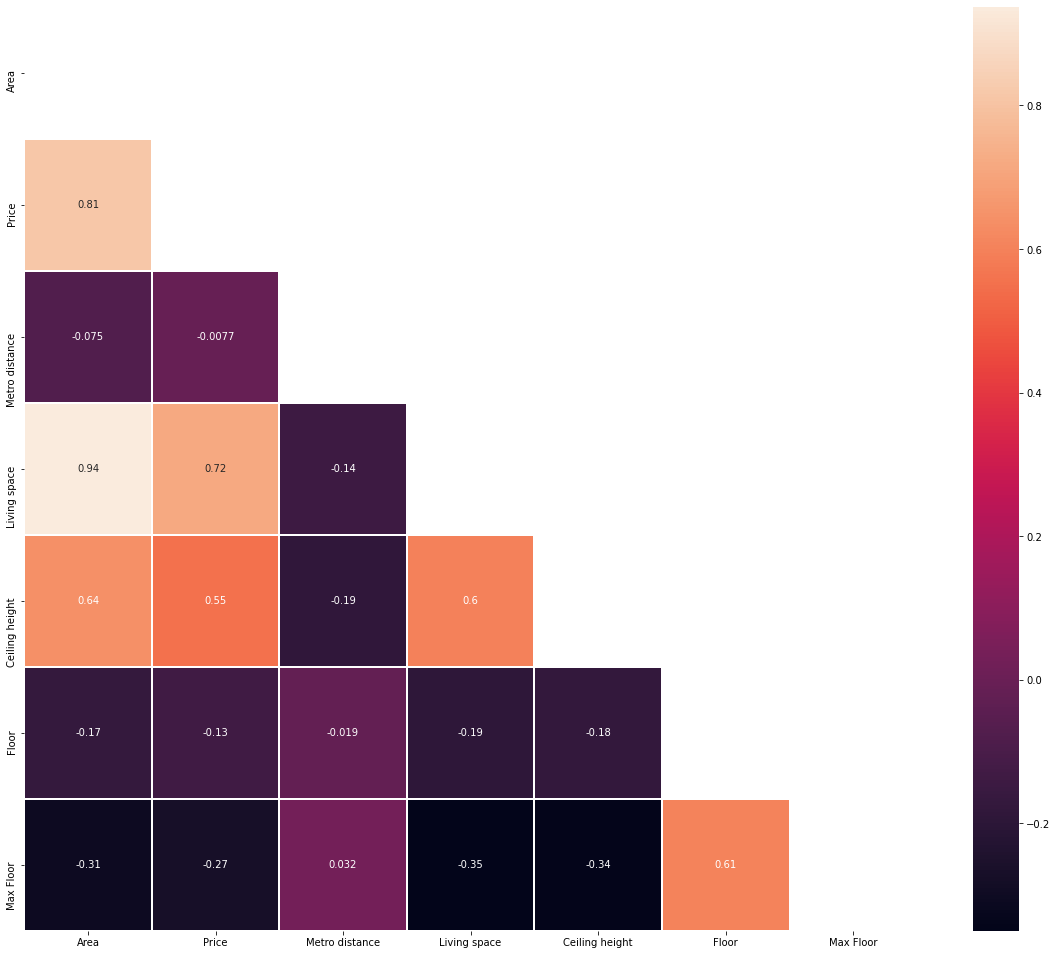

In [8]:
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())

sns.heatmap(data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket")


#### Гипотеза 1. Чем больше Area, тем больше Price

Text(0, 0.5, 'Price')

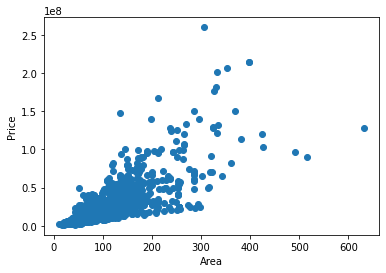

In [9]:
plt.scatter(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

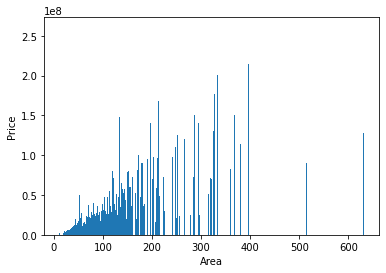

In [10]:
plt.bar(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

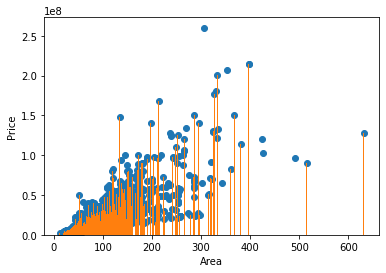

In [11]:
plt.scatter(data['Area'], data['Price'])
plt.bar(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')

Text(0.5, 1.0, 'Гипотеза 1')

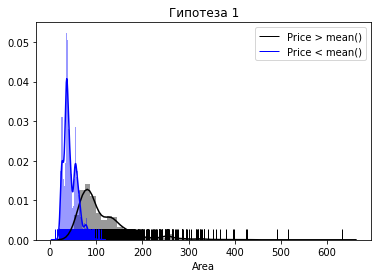

In [12]:
plt.figure()
sns.distplot(data['Area'][data.Price > data.Price.mean()], color="black", rug=True)
sns.distplot(data['Area'][data.Price < data.Price.mean()], color="blue", rug=True);
plt.legend(['Price > mean()', 'Price < mean()']) 
plt.title('Гипотеза 1')

In [ ]:
plt.figure(figsize=(20, 17))
data['Living space'].hist(bins=50)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

#### Гипотеза 2. Чем больше Living space, тем больше Ceiling height

Text(0, 0.5, 'Ceiling height')

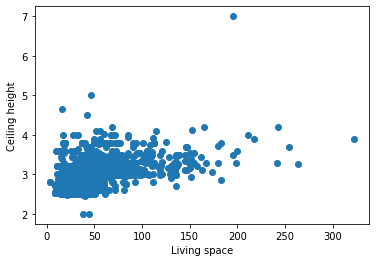

In [13]:
plt.scatter(data['Living space'], data['Ceiling height'])
plt.xlabel('Living space')
plt.ylabel('Ceiling height')

Text(0.5, 1.0, 'Гипотеза 1')

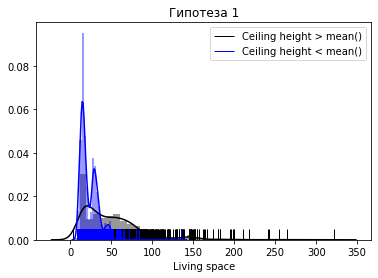

In [15]:
plt.figure()
sns.distplot(data['Living space'][data['Ceiling height'] > data['Ceiling height'].mean()], color="black", rug=True)
sns.distplot(data['Living space'][data['Ceiling height'] < data['Ceiling height'].mean()], color="blue", rug=True);
plt.legend(['Ceiling height > mean()', 'Ceiling height < mean()']) 
plt.title('Гипотеза 1')

#### Гипотеза 3. Чем меньше площадь жилья, тем больше продается таких квартир/студий/апартаментов

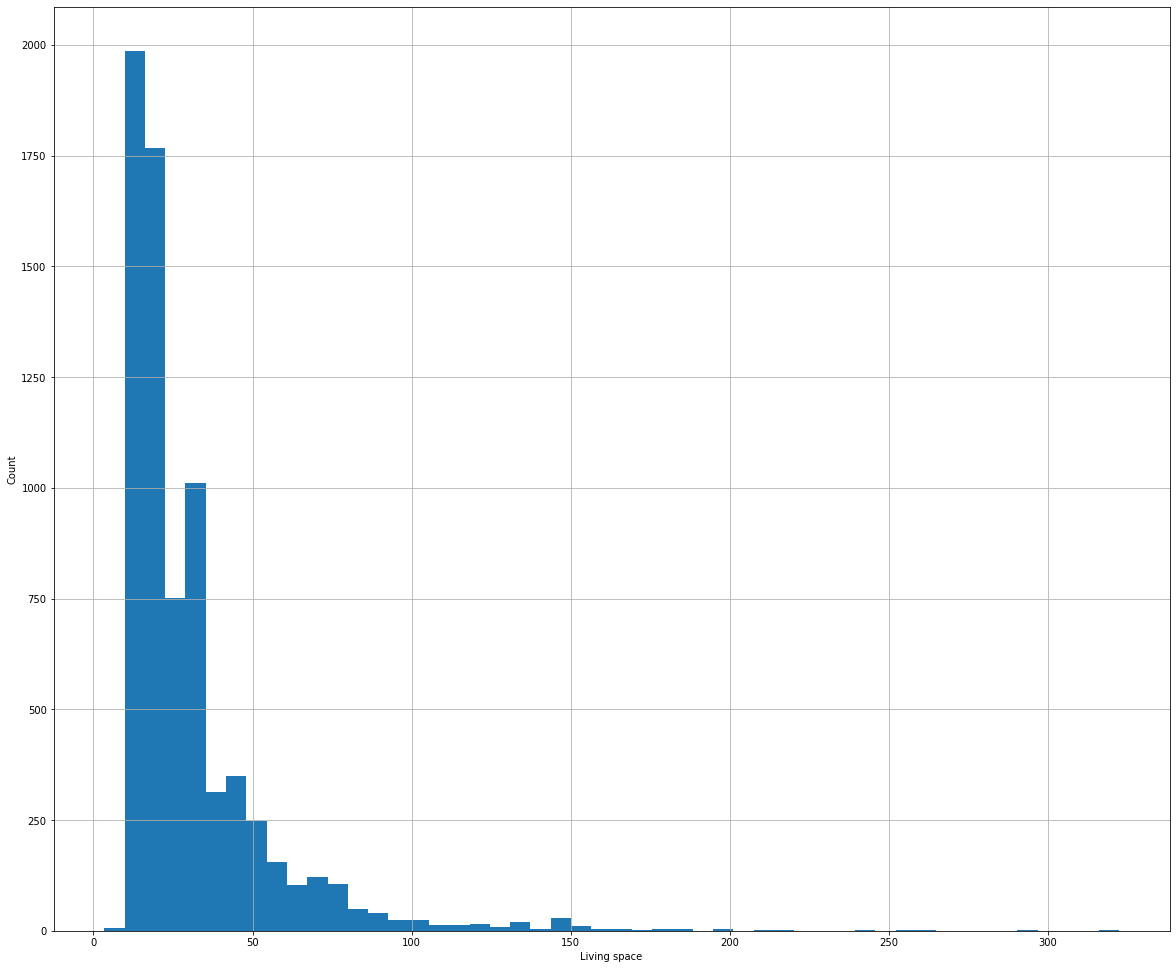

In [37]:
plt.figure(figsize=(20, 17))
data['Living space'].hist(bins=50)
plt.xlabel('Living space')
plt.ylabel('Count')
plt.show()

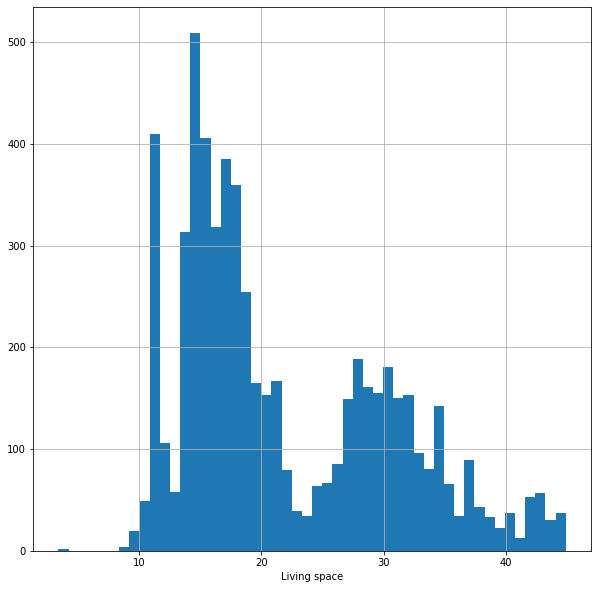

In [39]:
plt.figure(figsize=(10, 10))
data[data['Living space'] < 45]['Living space'].hist(bins=50)
plt.xlabel('Living space')
# plt.ylabel('Price')
plt.show()

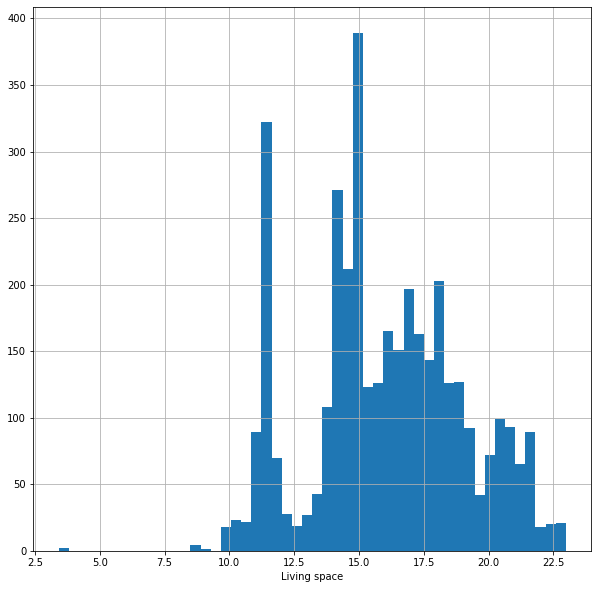

In [40]:
plt.figure(figsize=(10, 10))
data[data['Living space'] < 23]['Living space'].hist(bins=50)
plt.xlabel('Living space')
# plt.ylabel('Price')
plt.show()

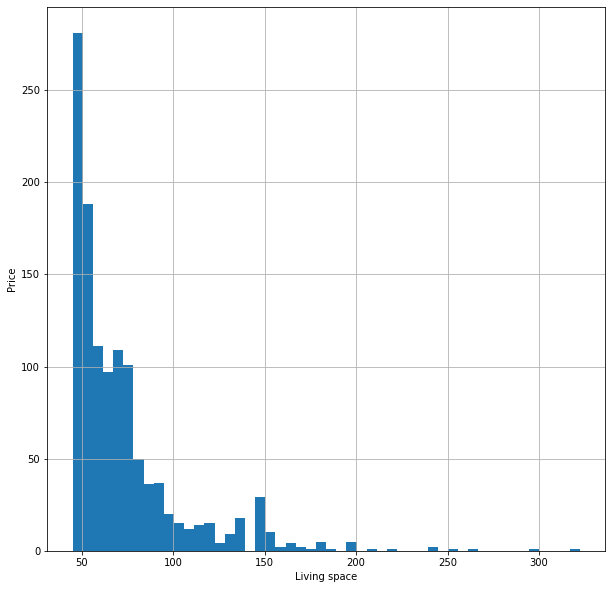

In [41]:
plt.figure(figsize=(10, 10))
data[data['Living space'] > 45]['Living space'].hist(bins=50)
plt.xlabel('Living space')
plt.ylabel('Price')
plt.show()

In [35]:
data

,Type of housing,Area,Price,Metro name,Metro distance,District,Living space,Ceiling height,Floor,Max Floor
4044,Студия,28.17,3043000,Ленинский проспект,5.4,Красносельский район,3.41,2.80,16,20
4056,Студия,28.17,3012000,Ленинский проспект,5.4,Красносельский район,3.41,2.80,14,20
5355,квартира,30.13,5354000,Елизаровская,102.6,Невский район,8.73,2.54,20,20
5386,квартира,30.86,4627000,Елизаровская,102.6,Невский район,8.74,2.54,1,20
5223,квартира,31.66,4422000,Елизаровская,102.6,Невский район,8.74,2.54,1,20
...,...,...,...,...,...,...,...,...,...,...
1332,квартира,321.30,69900000,Адмиралтейская,1.0,Центральный район,242.20,4.21,3,3
1497,квартира,342.00,65000000,Владимирская,0.5,Центральный район,254.30,3.70,3,5
534,квартира,380.40,114000000,Горьковская,0.8,Петроградский район,263.90,3.26,4,5
1525,квартира,491.70,97000000,Чернышевская,1.0,Центральный район,296.60,NaN,9,10
